# ML for AIR

In [ ]:
import pandas as pd
import numpy as np
import string as str
from datetime import datetime
import sys
import statsmodels.api as sm
#import pmdarima as pm
import matplotlib.pyplot as plt
#from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [19]:
path = r"D:\OneDrive - Wipro\Desktop\AIR\\"
infile =  path + "AIR_WDC_today_Q325.csv"

#table = pd.read_csv(infile, engine='python',sep=',', quotechar='"', error_bad_lines=False)

table_chunk = pd.read_csv(infile, engine='python', sep=',', chunksize=2000000)
table = pd.concat(list(table_chunk))

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

table.head()

,LOAD_DATE,SR_GUID,PROJECT_NUMBER,PROJECT_NAME,PROJECT_DESCRIPTION,CUSTOMER_NO,CUSTOMER_NAME,INDENT_STATUS,PROJECT_PROFIT_CENTER,PROJECT_PROFIT_CENTER_DESCRIPTION,...,SL_OPS_PC_CODE,SL_OPS_GBL,SL_OPS_SERVICE_LINE,SLWBS,SL_DM_ID,SL_DM_NAME,SL_PM_ID,SL_PM_NAME,SOW_OWNER_EMAIL,REPORT_TIME
0,2025-02-21,0DB01716A8EF1EDF9FEB94E4DD40BED7,400269,58767/P05/B08/S35,WPB FCP - India,16834.0,HSBC Software Development India Pv,INTERNAL,PC34100,EUROPE,...,PC53000,WIPRO FULLSTRIDE CLOUD,FSC - WDC,58767/P05/B08/SL06,278775.0,Dinesh Sasane,20318333.0,RUPESH SAINI,dinesh.sasane@wipro.com,21-FEB-2025 01:14:29
1,2025-02-21,0DB01716A8EF1EDFA08132AD9644FEF8,605170,73063/P03/B99/S61,73063/P03/B99SO00000035-PR2024K0936561,22529.0,HSBC Software Delvelopment India Pv,RECRUIT,PC34100,EUROPE,...,PC53000,WIPRO FULLSTRIDE CLOUD,FSC - WDC,73063/P03/B99/SL01,131690.0,Pravin Ranglalji Mantri,20388183.0,Smita Sarwate,pravin.mantri@wipro.com,21-FEB-2025 01:14:29
2,2025-02-21,0DB01716A8EF1EDFA0C88DE701443F80,55674,INS-NOR-PJ-RPA_DEV,INS-NWM-PJ- RPA DEV,2024.0,Northwestern Mutual,RECRUIT,PC32900,AMERICAS 2,...,PC53000,WIPRO FULLSTRIDE CLOUD,FSC - WDC,127604_USD/SL04,165191.0,Vijay Anand Viswanathan,300109.0,Kasirajesh Venkitakrishnan,vijay.vishwanathan@wipro.com,21-FEB-2025 01:14:29
3,2025-02-21,0DB01716A8EF1EDFA0B07C527A5D5F62,607431,73502/P03/B99/S56-1,73502/P03/B99SO00000158-PR2024K09391156,6427.0,"Ross Dress For Less, Inc.",INTERNAL,PC30300,AMERICAS 1,...,PC53000,WIPRO FULLSTRIDE CLOUD,FSC - WDC,73502/P03/B99/SL01,98788.0,Shyam Prasad Vidyala Naga,262221.0,Ashwin Kumar S,vidyala.shyam@wipro.com,21-FEB-2025 01:14:29
4,2025-02-21,0DB01716A8EF1EDFA18F6A4ADD669FB4,607092,38042/P05/B07/S35,CIT-CIT-PJ-ICG-TTS-CC-FPC,19857.0,"Citigroup Technology, Inc",RECRUIT,PC32100,AMERICAS 2,...,PC53000,WIPRO FULLSTRIDE CLOUD,FSC - WDC,NaN,NaN,NaN,NaN,NaN,vikas.gupta@wipro.com,21-FEB-2025 01:14:29


In [20]:
table.describe()

,PROJECT_NUMBER,CUSTOMER_NO,TM_ID,PM_ID,NO_OF_RESOURCES,PROPOSED,ALLOCATED,OPEN_POS,IFP_EMP_NO,ROLE_ID,...,GRP_CUST_CODE,EMP_NO,TOTAL_MTE_OPENINGS,TOTAL_MTE_ALLOCATED,TOTAL_INTERNAL_OPENINGS,TOTAL_INTERNAL_ALLOCATED,ZMTE_APPROVED_ON,SR_BILLABILITY_PERCENTAGE,SL_DM_ID,SL_PM_ID
count,37823.000000,3.688700e+04,3.782300e+04,3.782300e+04,37823.000000,37823.000000,37823.000000,37823.000000,3.782300e+04,37823.000000,...,3.680100e+04,3.782300e+04,37823.000000,37823.000000,37823.000000,37823.000000,3.782300e+04,37823.000000,3.286900e+04,3.286900e+04
mean,441354.263676,5.786608e+07,5.077633e+06,7.281329e+06,1.045634,0.465801,0.371626,0.034318,2.704967e+06,486.077889,...,5.204912e+06,2.377475e+05,0.113026,0.060651,0.932607,0.310975,1.685281e+06,98.792957,5.163415e+06,7.660856e+06
std,169025.234817,2.454168e+08,8.580805e+06,9.433255e+06,0.476213,2.918750,0.495670,0.324043,6.479837e+06,602.287089,...,6.414506e+03,2.433826e+06,0.412761,0.241883,0.485723,0.470715,5.592342e+06,8.776000,8.634703e+06,9.769915e+06
min,14345.000000,2.900000e+01,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,-2.000000,1.001900e+05,16.000000,...,5.200000e+06,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00
25%,358149.000000,4.721000e+03,1.218680e+05,2.831690e+05,1.000000,0.000000,0.000000,0.000000,1.001900e+05,115.000000,...,5.201040e+06,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,100.000000,1.218680e+05,3.084120e+05
50%,436949.000000,1.501000e+04,1.897070e+05,6.729350e+05,1.000000,0.000000,0.000000,0.000000,1.970180e+05,156.000000,...,5.201825e+06,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,100.000000,1.860950e+05,5.928740e+05
75%,606462.000000,3.766600e+04,8.447860e+05,2.013690e+07,1.000000,0.000000,1.000000,0.000000,5.500510e+05,1431.000000,...,5.205077e+06,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000e+00,100.000000,8.503210e+05,2.013687e+07
max,638515.000000,1.100045e+09,4.016579e+07,4.013274e+07,40.000000,140.000000,11.000000,15.000000,2.052723e+07,4391.000000,...,5.223485e+06,4.017224e+07,15.000000,4.000000,40.000000,11.000000,2.025022e+07,100.000000,4.016579e+07,4.013274e+07


In [21]:
df = table[['INDENT_CREATED_ON','ESSENTIAL_SKILL','NO_OF_RESOURCES','INDENT_STATE']]

In [22]:
df.head()

,INDENT_CREATED_ON,ESSENTIAL_SKILL,NO_OF_RESOURCES,INDENT_STATE
0,2024-10-01,Fullstack Java Enterprise,1,FULFILLED
1,2024-10-01,Fullstack Java Enterprise,1,CANCELLED
2,2024-10-04,Fullstack DevOps,1,FULFILLED
3,2024-10-03,Architecting,1,CANCELLED
4,2024-10-07,Fullstack DevOps,1,CANCELLED


In [7]:
df.describe()

,NO_OF_RESOURCES
count,37823.000000
mean,1.045634
std,0.476213
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,40.000000


In [23]:
df.rename(columns={'INDENT_CREATED_ON': 'Date'}, inplace=True)
df.rename(columns={'NO_OF_RESOURCES': 'Total'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37823 entries, 0 to 37822
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             37823 non-null  object
 1   ESSENTIAL_SKILL  37808 non-null  object
 2   Total            37823 non-null  int64 
 3   INDENT_STATE     37823 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [24]:
df.head()

,Date,ESSENTIAL_SKILL,Total,INDENT_STATE
0,2024-10-01,Fullstack Java Enterprise,1,FULFILLED
1,2024-10-01,Fullstack Java Enterprise,1,CANCELLED
2,2024-10-04,Fullstack DevOps,1,FULFILLED
3,2024-10-03,Architecting,1,CANCELLED
4,2024-10-07,Fullstack DevOps,1,CANCELLED


In [25]:
df['Date'] = pd.to_datetime(df.Date)
#df.head()
#meandf = df['Total'].mean(skipna=True)
#df=df.replace(0,meandf) 
#df['Total'] = df['Total'].replace(['0'],np.average(df['Total']))
df.head()

,Date,ESSENTIAL_SKILL,Total,INDENT_STATE
0,2024-10-01,Fullstack Java Enterprise,1,FULFILLED
1,2024-10-01,Fullstack Java Enterprise,1,CANCELLED
2,2024-10-04,Fullstack DevOps,1,FULFILLED
3,2024-10-03,Architecting,1,CANCELLED
4,2024-10-07,Fullstack DevOps,1,CANCELLED


In [26]:
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['2024-10-01', '2024-10-01', '2024-10-04', '2024-10-03',
               '2024-10-07', '2024-10-07', '2024-10-01', '2024-10-10',
               '2024-10-04', '2024-10-07',
               ...
               '2024-12-24', '2024-12-24', '2024-12-24', '2024-12-24',
               '2024-12-24', '2024-12-24', '2024-12-24', '2024-12-24',
               '2024-12-24', '2024-12-25'],
              dtype='datetime64[ns]', name='Date', length=37823, freq=None)

In [ ]:
df.asfreq('d').index # Setting the freq of series to Daily 'd'

In [82]:
df = df.groupby("Date").sum()

In [83]:
df = df.sort_index()
df = df['2024-10-01':'2024-12-31'].resample('D').sum()
df.head()

,ESSENTIAL_SKILL,Total,INDENT_STATE
Date,,,
2024-10-01,Fullstack Java EnterpriseSeleniumSeleniumSelen...,724,FULFILLEDCANCELLEDFULFILLEDFULFILLEDFULFILLEDC...
2024-10-02,Spring BootDevOpsSDETApplication TestingApplic...,111,FULFILLEDCANCELLEDFULFILLEDFULFILLEDFULFILLEDF...
2024-10-03,DevOpsSeleniumSeleniumSDETJAX-RS - Java API- R...,621,CANCELLEDCANCELLEDCANCELLEDCANCELLEDCANCELLEDF...
2024-10-04,Application Testing.NETPerformance TestingSele...,564,FULFILLEDCANCELLEDCANCELLEDCANCELLEDCANCELLEDC...
2024-10-05,Fullstack Java EnterprisePerformance TestingFu...,77,CANCELLEDFULFILLEDCANCELLEDFULFILLEDCANCELLEDC...


In [84]:
tdf = df['Total'] # copy of Dataframe
tdf



Date
2024-10-01    724
2024-10-02    111
2024-10-03    621
2024-10-04    564
2024-10-05     77
             ... 
2024-12-27    202
2024-12-28     57
2024-12-29     17
2024-12-30    223
2024-12-31    189
Freq: D, Name: Total, Length: 92, dtype: int64

In [85]:
tdf.to_csv("test.csv")

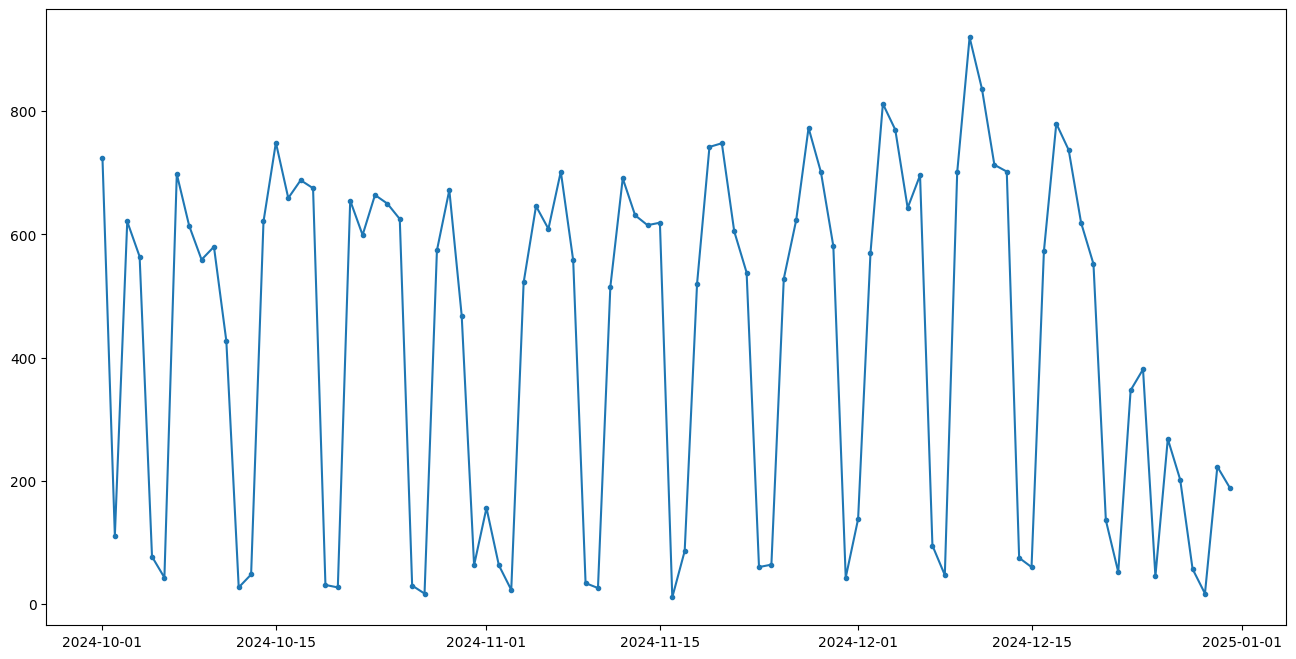

In [86]:
plt.figure(figsize=(16,8))
plt.plot(tdf, label='Open Position Trend', marker='.')

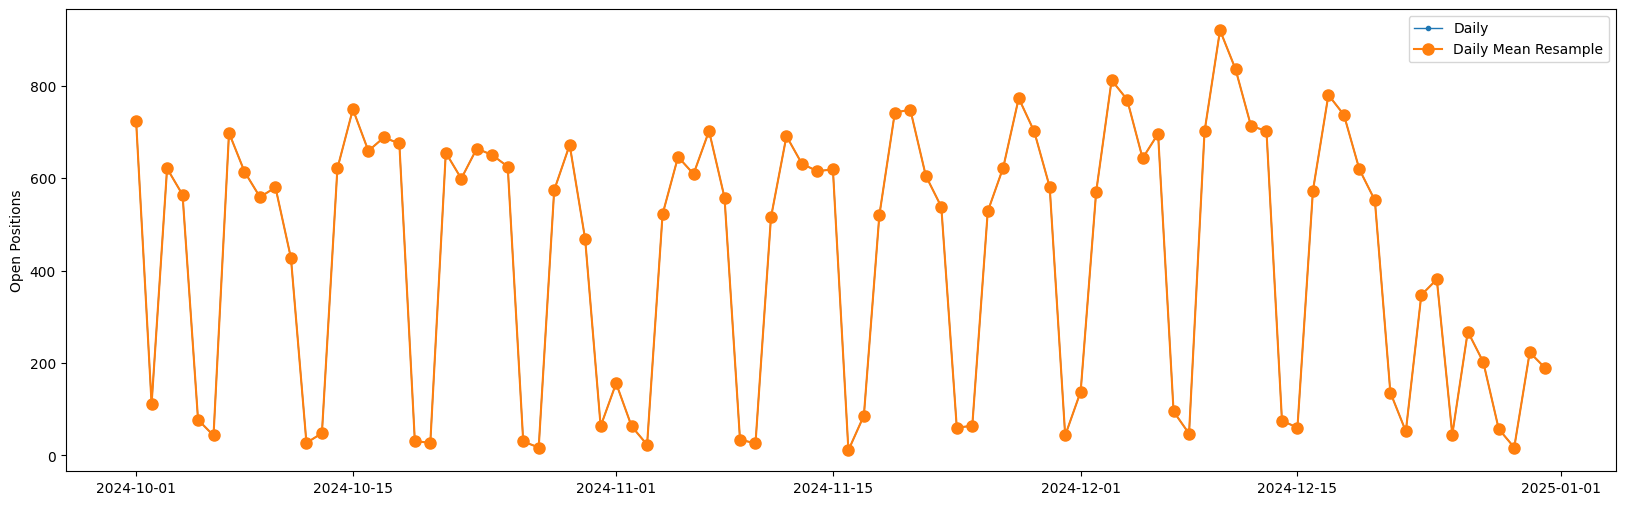

In [96]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(tdf,marker='.', linestyle='-', linewidth=1, label='Daily')
ax.plot(tdf.resample('D').mean(),marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.set_ylabel('Open Positions')
ax.legend()

In [97]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(timeseries, period = int(len(tdf)/2), model = "additive")  
#figure = plt.figure()  
#figure = decomposition.plot()  
#figure.set_size_inches(15, 8
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model ='additive',extrapolate_trend='freq', period=4)
    fig = decomposition.plot()
    fig.set_size_inches(24,8)
    plt.show()

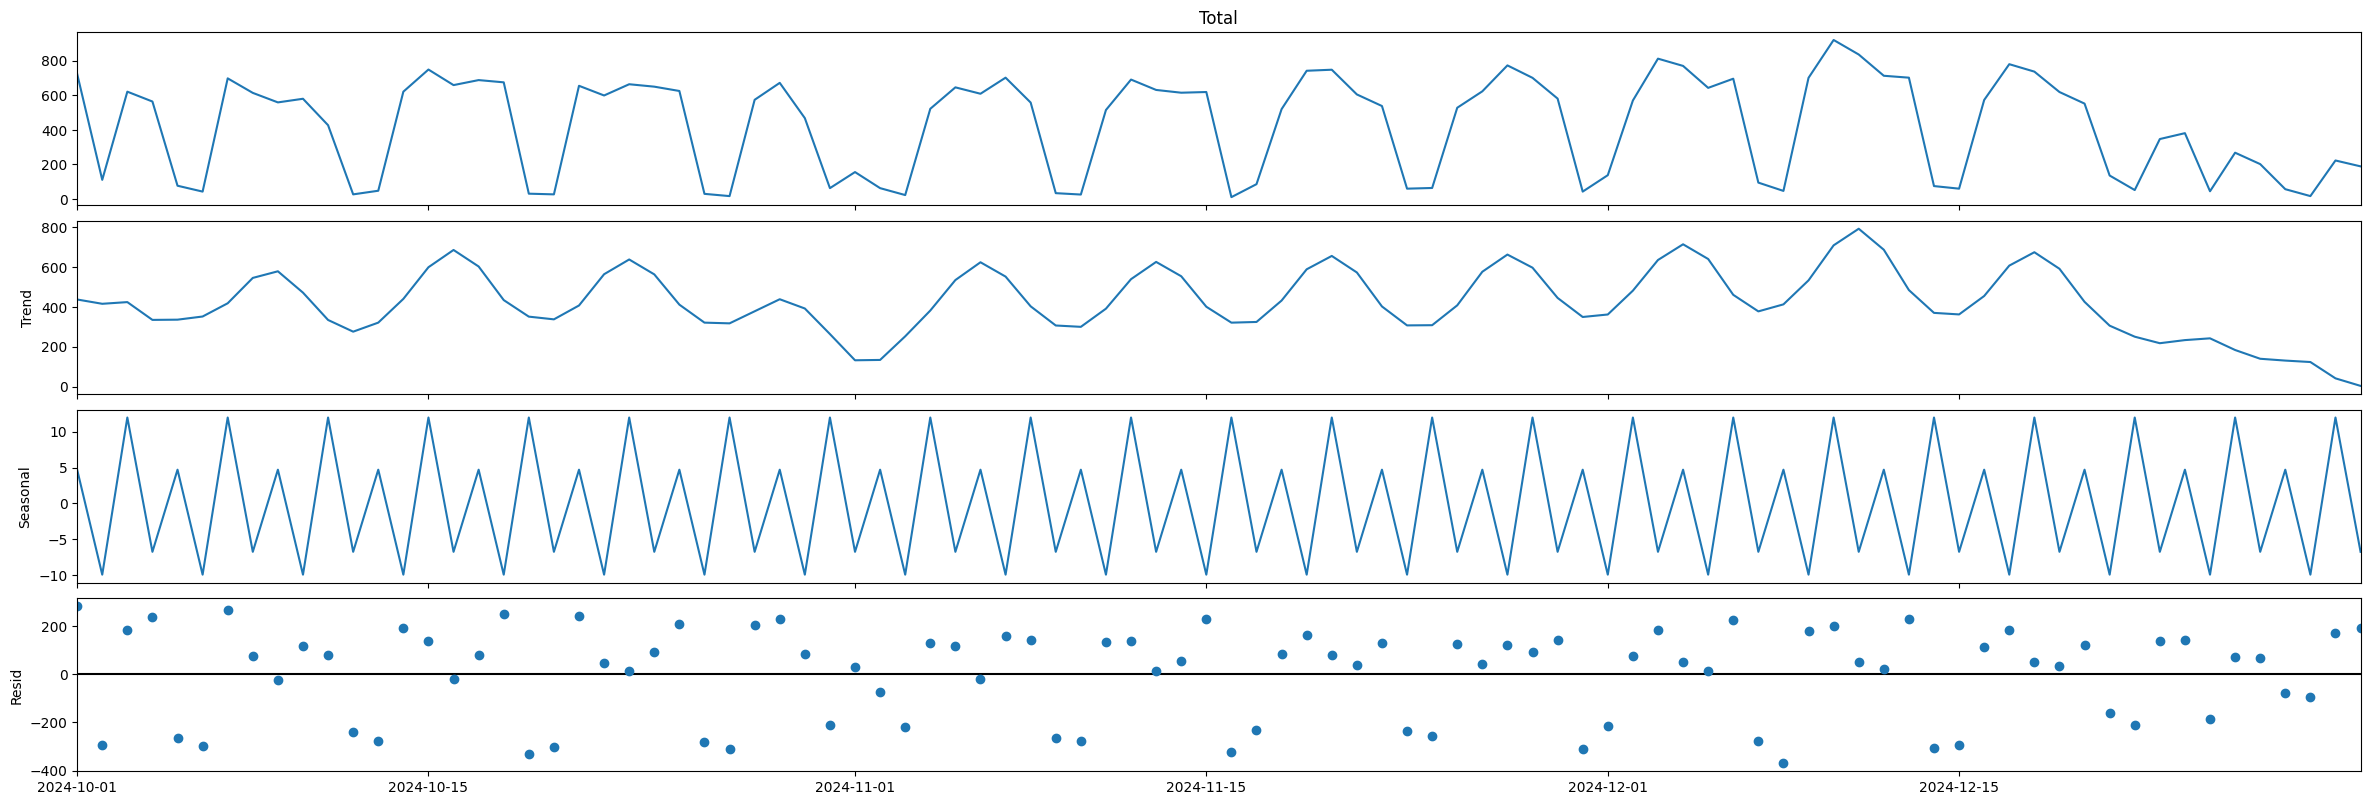

In [45]:
seasonal_decompose(tdf)

In [108]:
#plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    timeseries.rolling(4).mean().plot(label='4 Weeks Rolling Mean')
    timeseries.rolling(8).std().plot(label='8 Weeks Rolling Std')
    timeseries.plot(title=title)
    plt.legend()

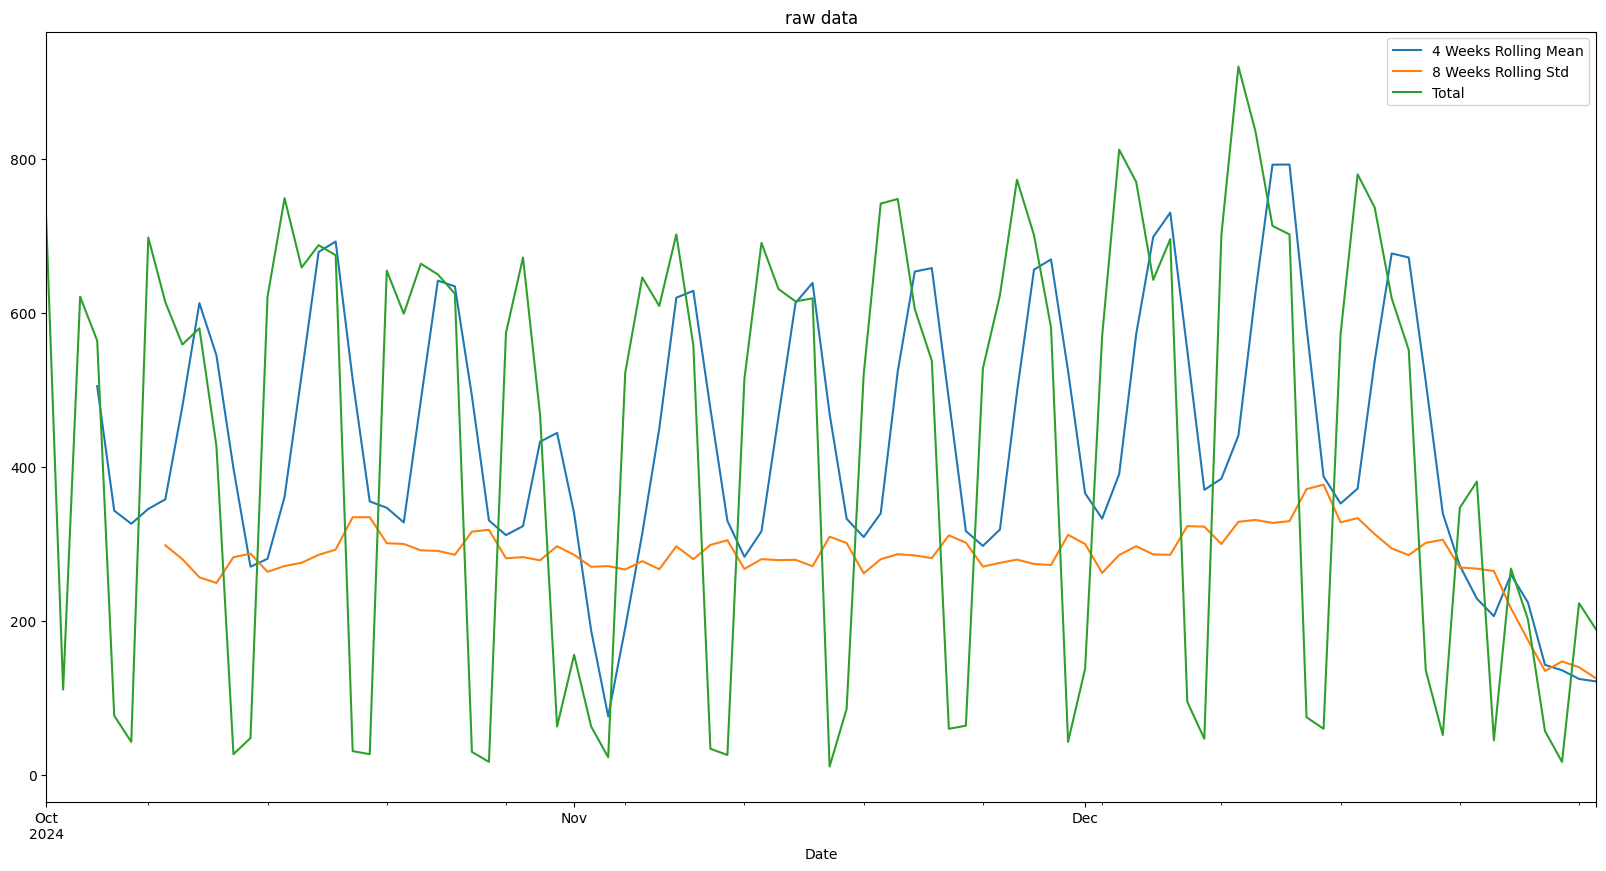

In [109]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(tdf,'raw data')

In [48]:
from statsmodels.tsa.stattools import adfuller

"""
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

    for value,label in zip(test_result,labels):
        print(label)
        print(value)
        #print (value)
    if test_result [1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("Fail to reject H0 thereby data is non-stationary ")
"""
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    test_result = adfuller(timeseries.dropna(),autolag='AIC')
    print ('ADF Test:')
    print('Test statistic = {:.3f}'.format(test_result[0]))
    print('P-value = {:.3f}'.format(test_result[1]))
    print('Critical values :')
    for k, v in test_result[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<test_result         [0] else '', 100-int(k[:-1])))

In [110]:
ADF_test(tdf,'raw data')

 > Is the raw data stationary ?
ADF Test:
Test statistic = -1.030
P-value = 0.742
Critical values :
	1%: -3.510711795769895 - The data is not stationary with 99% confidence
	5%: -2.8966159448223734 - The data is not stationary with 95% confidence
	10%: -2.5854823866213152 - The data is not stationary with 90% confidence


 > Is the de-trended data stationary ?
ADF Test:
Test statistic = -3.019
P-value = 0.033
Critical values :
	1%: -3.5159766913976376 - The data is not stationary with 99% confidence
	5%: -2.898885703483903 - The data is  stationary with 95% confidence
	10%: -2.5866935058484217 - The data is  stationary with 90% confidence


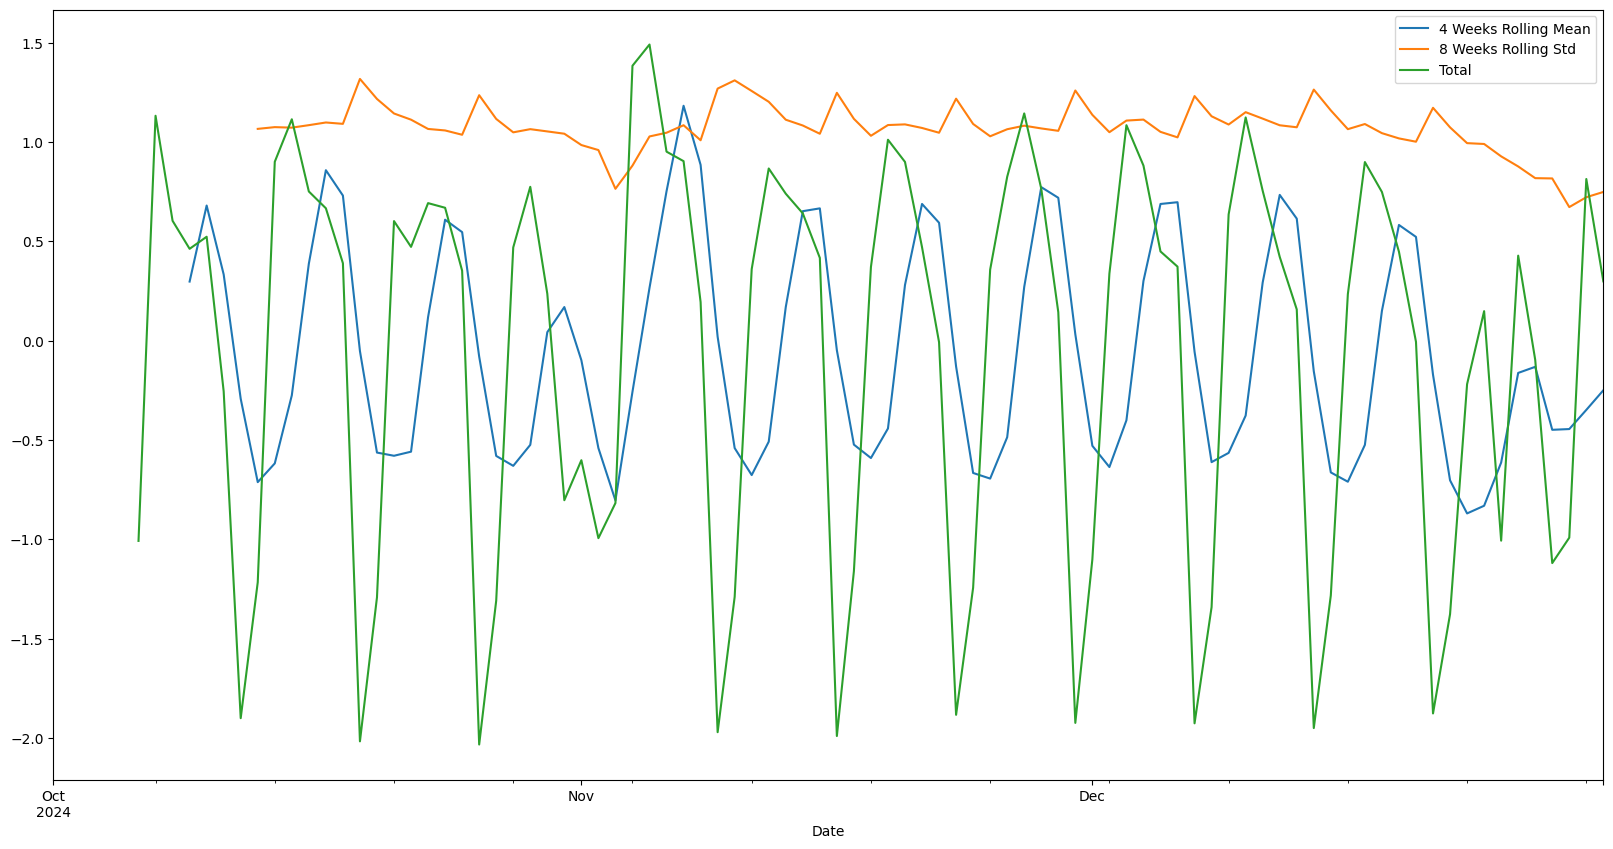

In [50]:
# Detrending
tdf_detrend =  (tdf - tdf.rolling(window=6).mean())/tdf.rolling(window=6).std()
test_stationarity(tdf_detrend,'de-trended data')
ADF_test(tdf_detrend,'de-trended data')

 > Is the 4 lag differenced data stationary ?
ADF Test:
Test statistic = -4.963
P-value = 0.000
Critical values :
	1%: -3.510711795769895 - The data is  stationary with 99% confidence
	5%: -2.8966159448223734 - The data is  stationary with 95% confidence
	10%: -2.5854823866213152 - The data is  stationary with 90% confidence


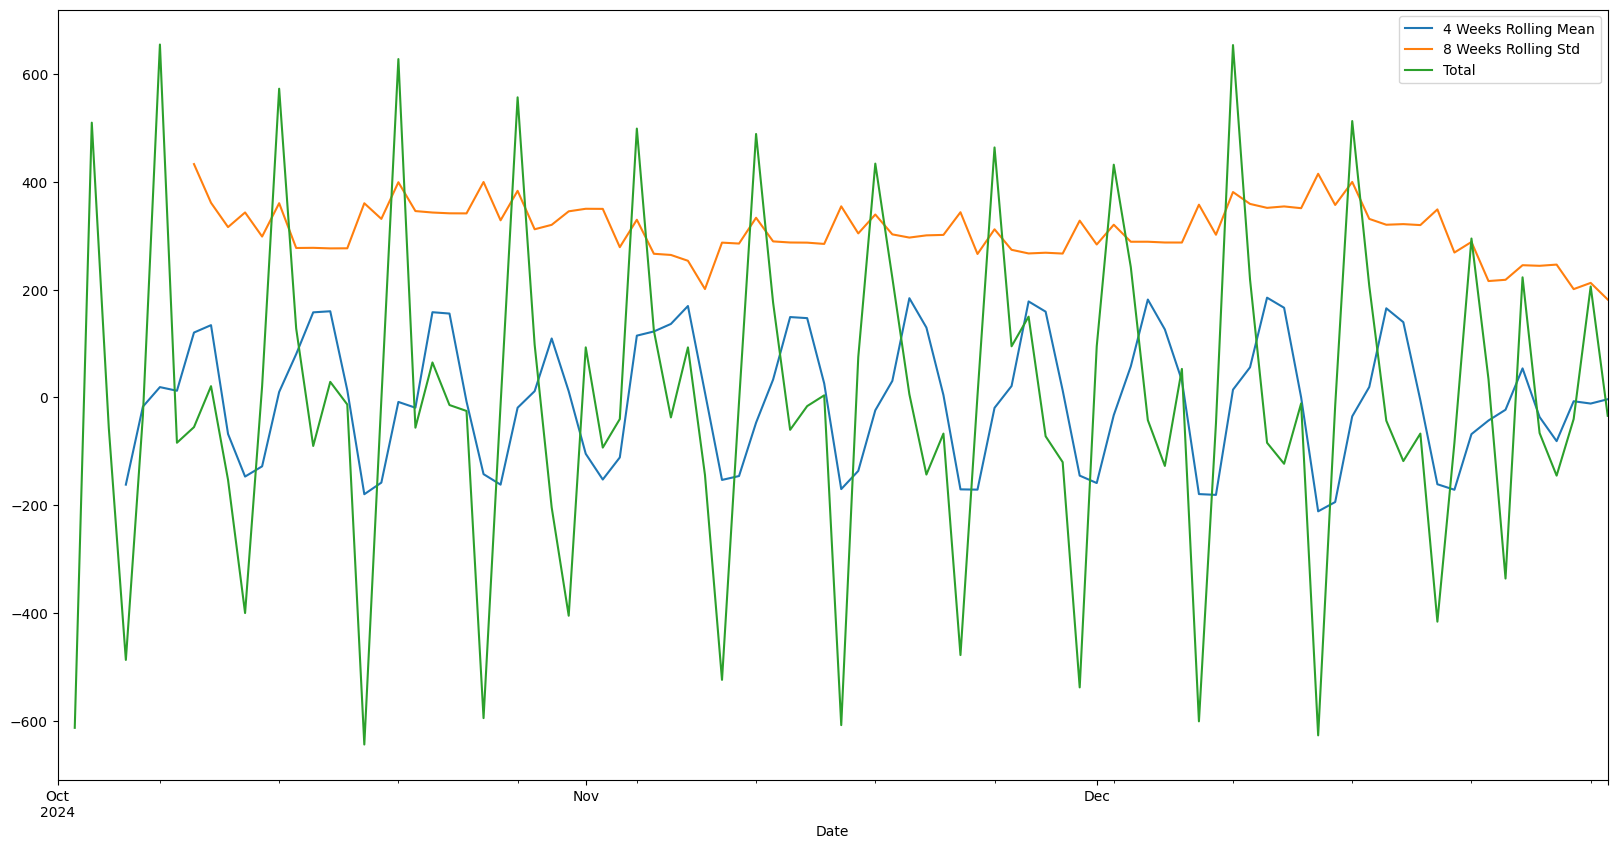

In [51]:
# Differencing
tdf_4lag =  tdf - tdf.shift(1)

test_stationarity(tdf_4lag,'4 lag differenced data')
ADF_test(tdf_4lag,'4 lag differenced data')

 > Is the 4 lag differenced de-trended data stationary ?
ADF Test:
Test statistic = -3.766
P-value = 0.003
Critical values :
	1%: -3.526004646825607 - The data is  stationary with 99% confidence
	5%: -2.9032002348069774 - The data is  stationary with 95% confidence
	10%: -2.5889948363419957 - The data is  stationary with 90% confidence


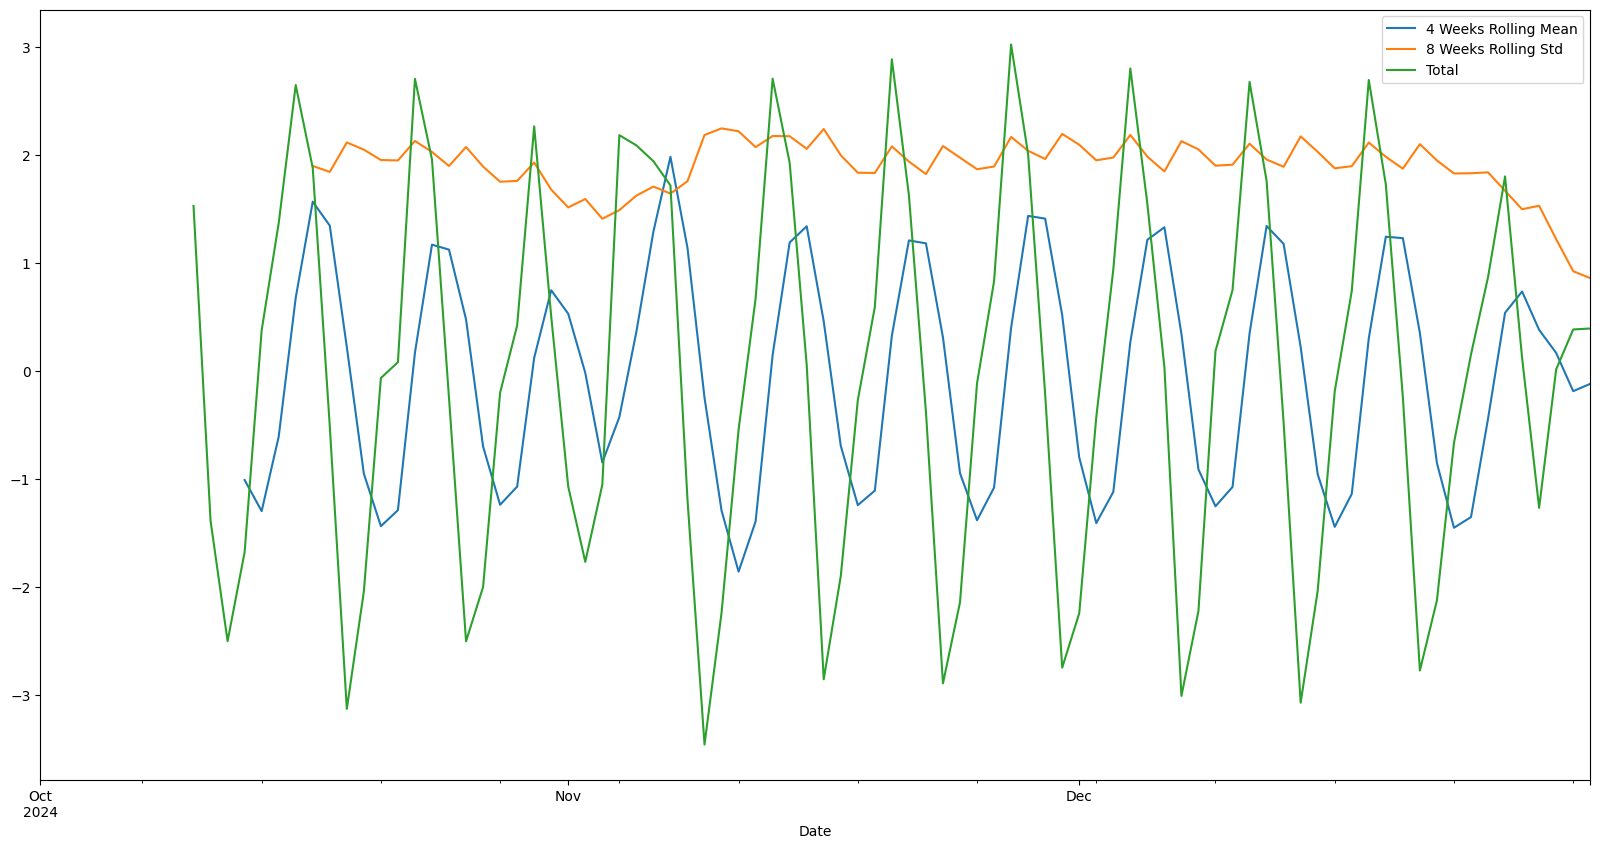

In [52]:
# Detrending + Differencing
tdf_4lag_detrend =  tdf_detrend - tdf_detrend.shift(4)
test_stationarity(tdf_4lag_detrend,'4 lag differenced de-trended data')
ADF_test(tdf_4lag_detrend,'4 lag differenced de-trended data')

In [111]:
y_to_train = tdf_4lag_detrend[:'2024-11-01'] # dataset to train
y_to_val = tdf_4lag_detrend['2024-11-02':] # last X months for test  
predict_date = len(tdf_4lag_detrend) - len(tdf_4lag_detrend[:'2024-12-25']) # the number of data points for the test set
#y_to_val.head()
#y_to_train.head()

In [112]:
import itertools

def sarima_grid_search(tdf,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(tdf,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [114]:
sarima_grid_search(tdf_4lag_detrend,4)

The set of parameters with the minimum AIC is: SARIMA(1, 0, 1)x(1, 0, 0, 4) - AIC:103.57744628596846


In [115]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                #enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(15, 12))
    #results.plot_diagnostics()

    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0000   3359.522      0.000      1.000   -6583.542    6585.542
ar.S.L12      -0.0007    1.1e+04  -5.92e-08      1.000   -2.16e+04    2.16e+04
ma.S.L12      -0.0006    1.1e+04   -5.5e-08      1.000   -2.16e+04    2.16e+04
sigma2         4.6969   1.58e+04      0.000      1.000   -3.09e+04    3.09e+04


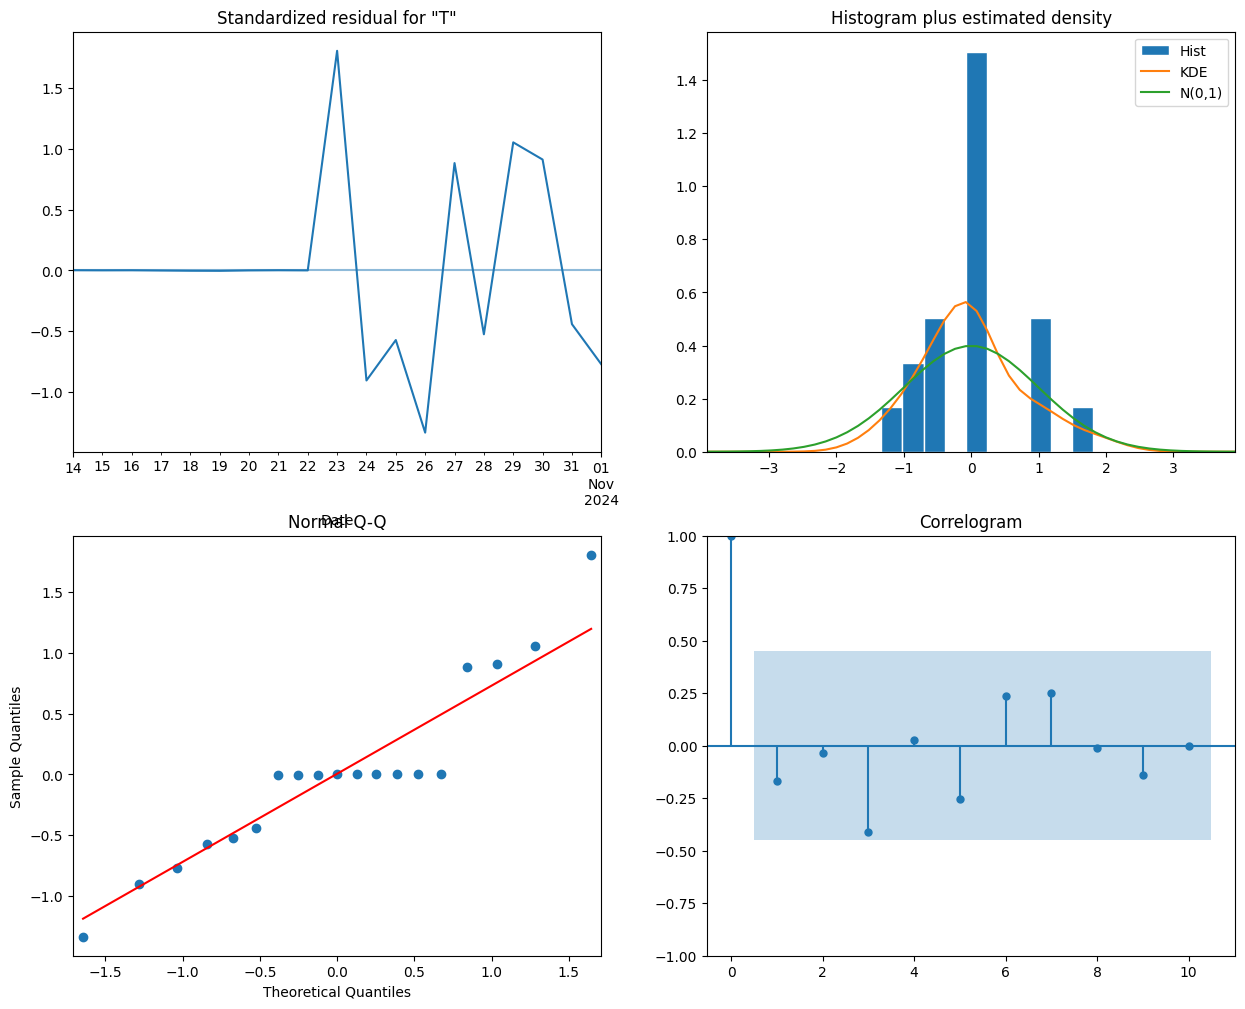

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [120]:
# No need to run this!!!!
model = sarima_eva(y_to_train,(0, 1, 1),(1, 1, 1, 12),12,'2021-03-31',y_to_val)

In [117]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

In [125]:
model = sm.tsa.statespace.SARIMAX(y_to_train.dropna(),order=(0,1,1), seasonal_order=(1,1,1,12))
ARIMAresult = model.fit()
print (ARIMAresult.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                   23
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -23.123
Date:                            Sat, 22 Feb 2025   AIC                             54.245
Time:                                    00:38:24   BIC                             55.456
Sample:                                10-10-2024   HQIC                            52.918
                                     - 11-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9941     16.274      0.061      0.951     -30.903      32.891
ar.S.L12      -0.3972   2.47e+06  -

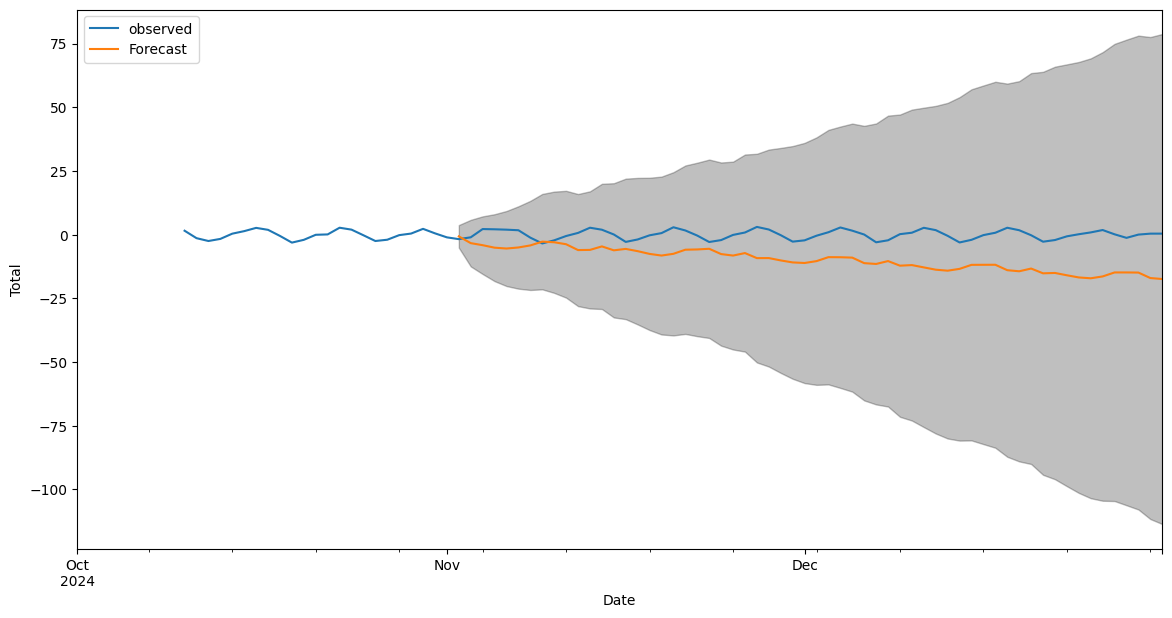

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2024-11-02,-0.68841466,-5.12449757,3.74766826
1,2024-11-03,-3.33916014,-12.47752420,5.79920392
2,2024-11-04,-4.14588503,-15.45925439,7.16748432
3,2024-11-05,-5.12157572,-18.25454816,8.01139672
4,2024-11-06,-5.45247658,-20.18195737,9.27700421
5,2024-11-07,-5.03830002,-21.20741389,11.13081384
6,2024-11-08,-4.23215239,-21.72280367,13.25849889
7,2024-11-09,-2.75305567,-21.47217748,15.96606615
8,2024-11-10,-2.99217250,-22.86396559,16.87962058
9,2024-11-11,-3.77076866,-24.73194228,17.19040496


In [135]:
final_table = forecast(ARIMAresult,60,tdf_4lag_detrend)
final_table.head(15)

In [130]:
PredictionResults = ARIMAresult.predict(1, len(tdf_4lag_detrend)+2, typ ='levels').rename('Sarima Predictions')
PredictionResults

2024-10-11     1.53062334
2024-10-12    -1.38705945
2024-10-13    -2.50290298
2024-10-14    -1.67794870
2024-10-15     0.37726289
                 ...     
2025-01-08   -17.83661367
2025-01-09   -17.82855412
2025-01-10   -17.85364702
2025-01-11   -19.99479217
2025-01-12   -20.39509154
Freq: D, Name: Sarima Predictions, Length: 94, dtype: float64

In [ ]:
from altair import to_csv
PredictionResults.to_csv("PredictionResults.csv")

In [137]:
#df['forecast_data'] = ARIMAresult.predict(start = 150, end= 168, dynamic= True)
#df [['Total','forecast_data']]. plot (figsize= (12,8))
ARIMAtable = pd.Series(ARIMAresult.fittedvalues, copy=True)
ARIMAresult.fittedvalues

Date
2024-10-10    0.00000000
2024-10-11    1.53062334
2024-10-12   -1.38705945
2024-10-13   -2.50290298
2024-10-14   -1.67794870
2024-10-15    0.37726289
2024-10-16    1.36940990
2024-10-17    2.65050390
2024-10-18    1.88195225
2024-10-19   -0.51058234
2024-10-20   -3.13050627
2024-10-21   -2.04274570
2024-10-22    0.70084624
2024-10-23   -2.83527935
2024-10-24    4.36456140
2024-10-25    1.18324366
2024-10-26    0.73064061
2024-10-27   -4.10004594
2024-10-28    1.02976909
2024-10-29   -2.02174696
2024-10-30    0.16812250
2024-10-31    1.51507643
2024-11-01    0.68488618
Freq: D, dtype: float64

Text(0.5, 1.0, 'RMSE: 1.0131')

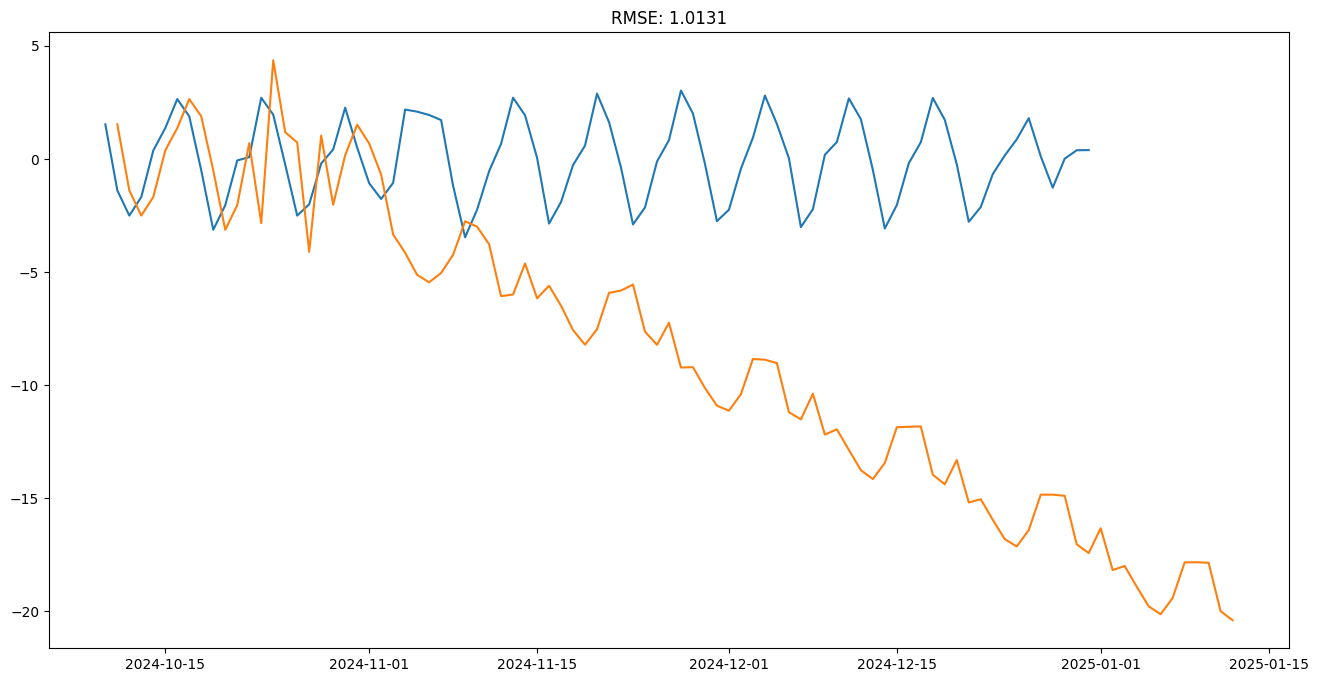

In [138]:
plt.figure(figsize=(16,8))
plt.plot(tdf_4lag_detrend)
plt.plot(PredictionResults)
plt.title('RMSE: %.4f'% np.sqrt(sum((ARIMAtable)**2)/len(tdf)))

In [65]:
# Auto ARIMA
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p = 0,
                              start_q = 0,
                              start_d = 0,
                              max_d = 8,
                              max_p = 8,
                              max_q = 8,
                              test = 'adf',
                              start_P = 0,
                              start_Q = 0,
                              start_D = 0,
                              max_P = 8,
                              max_Q = 8,
                              max_D = 8,
                              stepwise= True,
                              seasonal = True,
                              trace = True,
                              m=12)
    return automodel

In [66]:
arimamodel(tdf)

NameError: name 'pm' is not defined

In [ ]:
import pickle
pickle.dump(ARIMAresult, open('model.pkl','wb'))

In [ ]:
print(pm.auto_arima(tdf.dropna(),seasonal=True, m=12, test = 'adf').summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -317.425
Date:                Thu, 02 Sep 2021   AIC                            638.850
Time:                        22:19:17   BIC                            642.125
Sample:                             0   HQIC                           640.015
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9094      0.168     -5.428      0.000      -1.238      -0.581
sigma2      1.013e+06   2.36e+05      4.300      0.000    5.51e+05    1.47e+06
Ljung-Box (L1) (Q):                   1.15   Jarque-

In [ ]:
x = len(tdf)*(80/100)
x

32.0

In [ ]:
y_to_train = tdf.iloc[:(int)(len(df)*(80/100))]
y_to_val = tdf.iloc[:(int)(len(df)*(20/100))]

In [ ]:
model = sm.tsa.statespace.SARIMAX(tdf.dropna(),order=(3,3,0), seasonal_order=(0,0,0,12))

In [ ]:
results = model.fit()

In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   40
Model:               SARIMAX(3, 3, 0)   Log Likelihood                -310.266
Date:                Thu, 02 Sep 2021   AIC                            628.531
Time:                        22:20:41   BIC                            634.975
Sample:                    04-05-2020   HQIC                           630.803
                         - 01-03-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5049      0.127    -11.838      0.000      -1.754      -1.256
ar.L2         -1.3570      0.171     -7.949      0.000      -1.692      -1.022
ar.L3         -0.5892      0.135     -4.371      0.0

In [ ]:
start = len(y_to_train)

In [ ]:
end = start + len(y_to_val) - 1

In [ ]:
PredictionResults = results.predict(0, len(tdf)+1, typ ='levels').rename('Sarima Predications')

<AxesSubplot:xlabel='Date'>

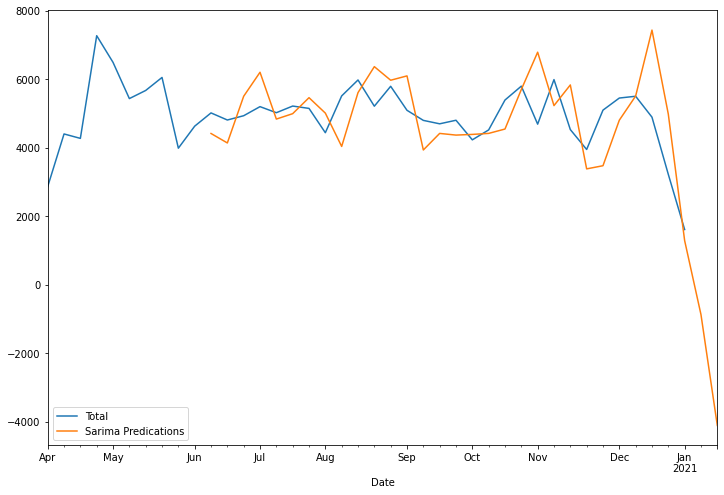

In [ ]:
tdf.plot(legend=True,figsize=(12,8))
PredictionResults[10:].plot(legend=True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(y_to_val,PredictionResults)
error

ValueError: operands could not be broadcast together with shapes (8,) (42,) 

In [ ]:
import nltk

: 